In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

data = "C:/Programación/Lab Intermedio/Muones/muon.data"
data = pd.read_csv(data, delimiter=' ')

print(data)

        40000  1715382134
0       40000  1715382135
1       40000  1715382136
2       40000  1715382137
3       40000  1715382138
4       40000  1715382139
...       ...         ...
503741  40000  1724170992
503742  40000  1724170993
503743  40000  1724170994
503744  40000  1724170995
503745  40000  1724170996

[503746 rows x 2 columns]


In [2]:
df=pd.DataFrame(data)
df=df.rename(columns={'40000':'Tiempo','1715382134':'Fecha'})
df

,Tiempo,Fecha
0,40000,1715382135
1,40000,1715382136
2,40000,1715382137
3,40000,1715382138
4,40000,1715382139
...,...,...
503741,40000,1724170992
503742,40000,1724170993
503743,40000,1724170994
503744,40000,1724170995


In [3]:
df1=df.drop('Fecha', axis=1)
df1=df1[df1['Tiempo']<40000]*10**(-3)
df1

,Tiempo
954,2.74
970,1.24
987,3.06
1003,3.78
1006,15.70
...,...
503065,0.94
503071,0.06
503145,3.22
503194,0.10


In [4]:
filas=len(df1)

In [5]:
conteo_df = df1.groupby('Tiempo').size().reset_index(name='Cantidad')
#conteo_df=df1.groupby('error-Tiempo').size().reset_index(name='Cantidad')
conteo_df['Error Tiempo']=0.01
conteo_df['Error decay']=0.01
conteo_df

,Tiempo,Cantidad,Error Tiempo,Error decay
0,0.04,28,0.01,0.01
1,0.06,734,0.01,0.01
2,0.08,48,0.01,0.01
3,0.10,103,0.01,0.01
4,0.12,73,0.01,0.01
...,...,...,...,...
732,19.82,1,0.01,0.01
733,19.84,1,0.01,0.01
734,19.88,1,0.01,0.01
735,19.90,1,0.01,0.01


In [6]:
Time,Cantidad=np.array(conteo_df['Tiempo']), np.array(conteo_df['Cantidad'])

In [7]:
#plt.scatter(conteo_df['Cantidad'],conteo_df['Tiempo'], s=1)

In [8]:
Ter, Der=np.array(conteo_df['Error Tiempo']),np.array(conteo_df['Error decay'])

In [9]:
f_cum=np.cumsum(Cantidad)

In [10]:
decay=filas-f_cum
#decay[-1]=1/10000000

Text(0, 0.5, 'Frecuencia')

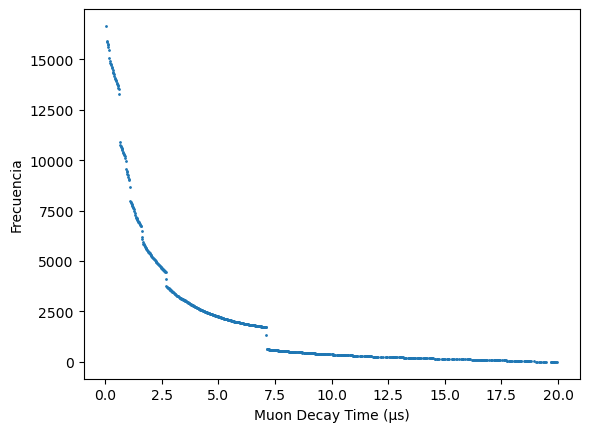

In [11]:
plt.scatter(Time, decay, s=1)
plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')

In [13]:
#def expo(x,a,b):
 #   return a*np.exp(-x/b)

In [18]:
param, cov= scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t*b) +c , Time,decay)
incert =np.sqrt(np.diag(cov))
incert

C:\Users\Personal\AppData\Local\Temp\ipykernel_25124\2302877479.py:1: RuntimeWarning: overflow encountered in exp
  param, cov= scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t*b) +c , Time,decay)
C:\Users\Personal\AppData\Local\Temp\ipykernel_25124\2302877479.py:1: RuntimeWarning: overflow encountered in multiply
  param, cov= scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-t*b) +c , Time,decay)


array([1.07058811e+02, 6.03690688e-03, 2.63935944e+01])

In [19]:
param, incert

(array([1.56506521e+04, 5.20880094e-01, 4.09678657e+02]),
 array([1.07058811e+02, 6.03690688e-03, 2.63935944e+01]))

In [20]:
1/param[1]

1.9198276386239668

In [21]:
x=np.linspace(0,20,len(decay))
#y=expo(x,param[0], param[1])
y=param[0]*np.exp(-x*param[1])+param[2]
y

array([16060.33073633, 15840.3663224 , 15623.49343098, 15409.66861183,
       15198.84902535, 14990.99243406, 14786.0571941 , 14584.00224691,
       14384.78711098, 14188.37187376, 13994.71718366, 13803.78424217,
       13615.53479605, 13429.93112974, 13246.93605771, 13066.51291711,
       12888.62556032, 12713.23834781, 12540.31614093, 12369.82429488,
       12201.72865181, 12035.99553391, 11872.59173673, 11711.48452249,
       11552.64161351, 11396.03118579, 11241.62186258, 11089.38270814,
       10939.28322151, 10791.29333039, 10645.38338519, 10501.52415297,
       10359.6868117 , 10219.84294441, 10081.96453352,  9946.02395523,
        9811.99397398,  9679.84773702,  9549.55876896,  9421.10096656,
        9294.44859341,  9169.57627486,  9046.45899285,  8925.07208097,
        8805.39121946,  8687.3924304 ,  8571.05207284,  8456.34683811,
        8343.25374515,  8231.75013585,  8121.81367059,  8013.4223237 ,
        7906.5543791 ,  7801.1884259 ,  7697.30335413,  7594.87835053,
      

Text(0.5, 1.0, 'Frecuencia vs. Tiempo (regresión)')

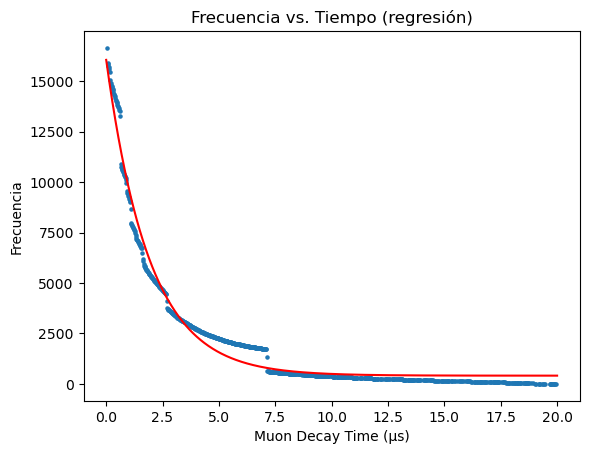

In [35]:
plt.plot(x,y,color='red')
plt.scatter(Time, decay, s=5)
#plt.errorbar(Time, decay,Ter,Der,fmt='o')
plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia vs. Tiempo (regresión)')

In [23]:
y_fit=param[0]*np.exp(-Time*param[1])+param[2]

In [24]:
residual=(decay-y_fit)

Text(0.5, 1.0, 'Frecuencia vs. Tiempo (regresión e incertidumbres)')

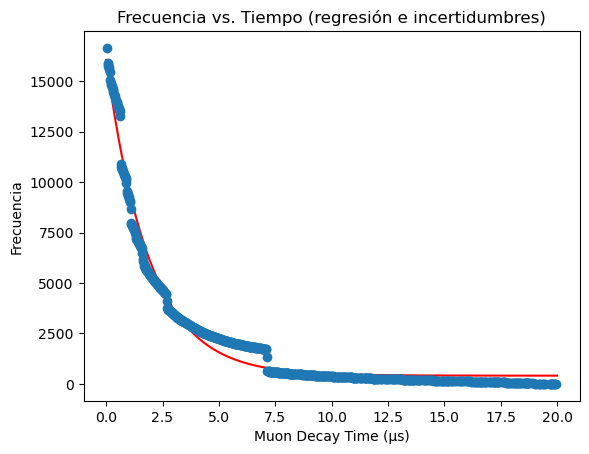

In [34]:
plt.plot(x,y,color='red')
plt.scatter(Time, decay, s=5)
plt.errorbar(Time, decay,Ter,Der,fmt='o')
plt.xlabel('Muon Decay Time (µs)')
plt.ylabel('Frecuencia')
plt.title('Frecuencia vs. Tiempo (regresión e incertidumbres)')

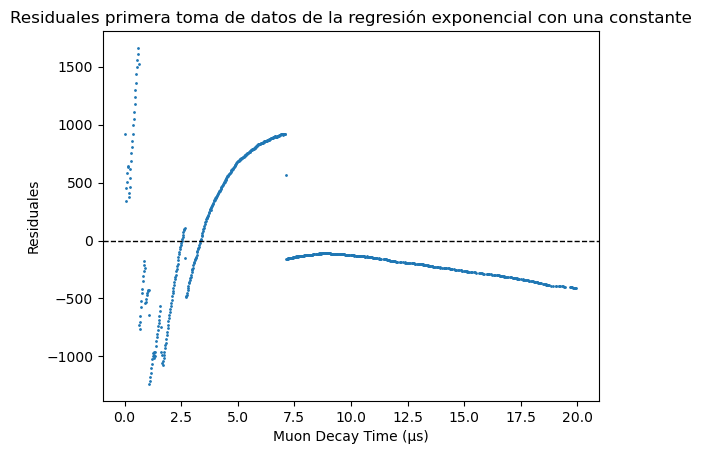

In [30]:
fig, ax = plt.subplots()
ax.set_title('Residuales primera toma de datos de la regresión exponencial con una constante')
ax.scatter(Time,residual, s=1)
ax.set_xlabel('Muon Decay Time (µs)')
ax.set_ylabel('Residuales')
ax.axhline(0, color='black', linewidth=1, linestyle='--')